# [EP12] 뉴스요약봇 만들기
---

오늘은 긴 문장을 짧게 요약해주는 텍스트 요약기를 실습해보고 뉴스를 요약해보는 실습까지 한다.

기술의 발전으로 다양한 분야의 많은 정보들을 파악해야하는데, 텍스트 요약기술로 핵심만 추출해서 볼 수 있도록 돕늗다. 맘에 들면 더 자세히 보고, 간략하게 핵심정보만 파악하고 넘어가도 된다. 이러한 기술이 화상회의 요약 등으로 다양한 회의에서 어떠한 이야기가 있었는지 요약해서 볼 수도 있다.

# 텍스트 요약이란
---
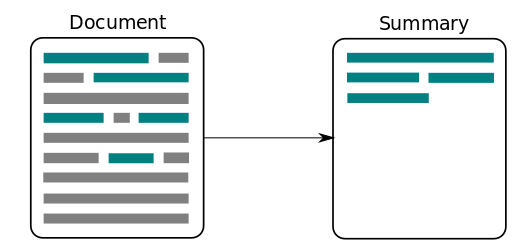
위 그림과 같이 긴 문서의 핵심만을 짧게 요약한다. 뉴스 제목만을 추출하는 간단한 텍스트 요약기부터, 내용을 요약해주는 요약기까지 목적과 종류가 다양하다. 이때 중요한 것이 정보 손실이 최소화 되야한다는 것이다. 텍스트 정보를 압축하는데, 길이는 줄지만, 최대한의 내용을 보존해야한다.

그래서 텍스트 요약은 다양한 기법들이 개발되고 있다.
- 추출적 요약, Extractive Summarization
- 추상적 요약, Abstractive Summarization

## 추출적 요약
첫 번째 방식인 추출적 요약은 단어 그대로 원문에서 문장들을 추출해서 요약하는 방식이다. 10개의 문장으로 된 텍스트 자료가 있다면, 핵심적인 문장 3개를 꺼내와 3개의 문장으로 구성된 요약문을 만들어 주는 건데, 3개의 문장이 원문에서 중요한 문장일 수 있어도, 3개의 문장이 자연스럽지 않을 수 있다.
이런 방식은 머신러닝에 속하는 텍스트랭크(TextRank)와 같은 알고리즘을 사용한다.

## 추상적 요약
두 번째 방식인 추상적 요약은 원문으로부터 내용이 요약된 새로운 문장을 생성해낸다. 없던 문장도 만들어 내는 것이다. 문장을 입력해서 새로운 문장으로 만들어내는 것이 지난 텍스트 생성기와 비슷한 점이 있다.

### 추상적 요약의 어려움
텍스트 생성기에서 봤듯이, Natural Language Genration은 주로 RNN 등이 사용되는데 장기의존성 문제가 있어서, 텍스트가 길어지면, 생성기에 반영되기 어려운 문제가 있었다. 구글은 인코더-디코더 구조로 구성된 seq2seq 아키텍처를 이용해서 요약봇을 만들었다.

# 인공 신경망으로 텍스트 요약 훈련시키기
---
seq2seq 모델을 통해서, 추상적 요약기를 만들어 본다. seq2seq는 인코더 RNN와 디코더 RNN 2개의 아키텍처를 사용하여 시퀀스를 입력받아, 시퀀스를 출력한다.

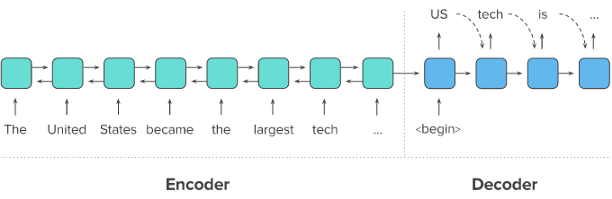

원문을 첫 번째 RNN인 인코더로 입력하면, 하나의 백터로 변환시키고, 이 백터를 컨텍스트 백터라고 한다. 디코더 RNN은 컨텍스트 벡터를 전달받아 한 단어씩 생성해내서 요약 문장을 완성한다.

## LSTM과 컨텍스트 벡터
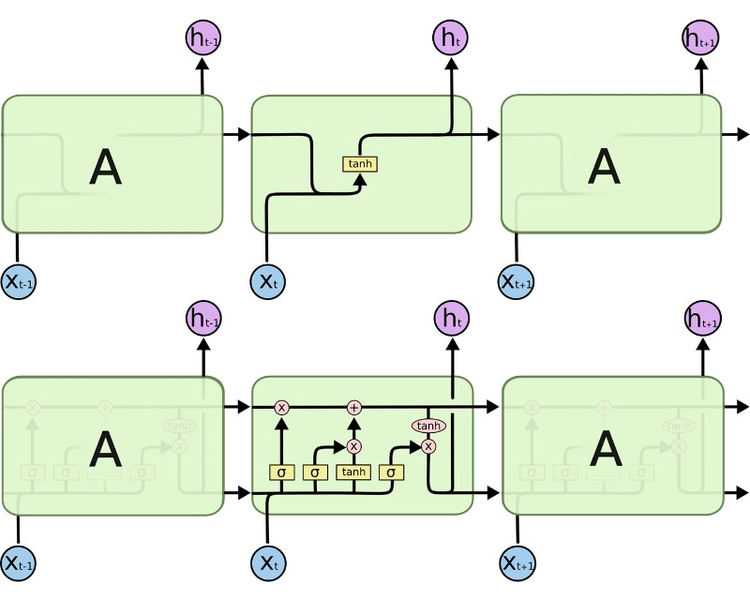
<center>*[RNN과 LSTM] : http://colah.github.io/posts/2015-08-Understanding-LSTMs*</center>
위의 RNN 아키텍처와 다르게 아래 LSTM은 은닉층말고 셀 스테이트도 함께 전한다. 인코더가 디코더에 전달하는 컨텍스트 벡터 또한 은닉층과 셀스테이트를 가진다.

## 시작 토큰과 종료 토큰
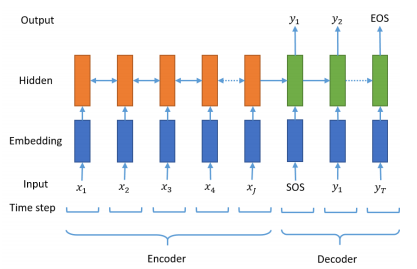
<center>*[시작 토큰 SOS와 종료 토큰 EOS는 각각 start of a sequence와 end of a sequence를 나타낸다]
https://arxiv.org/pdf/1812.02303.pdf*</center>

seq2seq 구조에서 디코더는 시작 토큰 \<SOS>가 입력되면, 각 시점마다 단어를 생성하고 이 과정에서 종료 토큰 \<EOS>를 예측하는 순간까지 멈추지 않는다.

## 어텐션 메커니즘을 통한 새로운 컨텍스트 벡터 사용하기
기존의 seq2seq는 인코더의 마지막 time step의 은닉층을 컨텍스트벡터로 사용했다. RNN 계열의 인공신경망 (바닐라 RNN, LSTM, GRU 등)의 한계로 컨텍스트 정보에는 입력 시퀀스의 정보가 많이 손실되게 된다.

어텐션 메커니즘은 이와 다르게 인코더의 모든 time step의 은닉층의 정보가 컨텍스트 벡터에 전부 반영되도록 하는 것이다. 동일한 비중으로 반영되는 것은 아니고 디코더의 현재 time step의 예측에 인코더의 time step이 예측이 얼마나 영향을 미치는 지에 따른 가중합으로 계산한다.
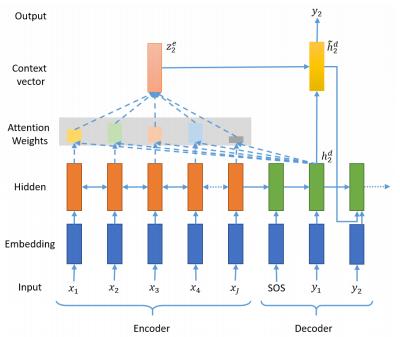
<center>*[기존의 컨텍스트 벡터보다 인코더의 정보를 적극적으로 활용하여 성능을 끌어올리는 어텐션 메커니즘]
https://arxiv.org/pdf/1812.02303.pdf*</center>

위 그림의 예로들면, seq2seq 모델이라면, 디코더로 전달되는 인코더의 컨텍스트 백터는 인코더의 마지막 스텝인 은닉층의 h5가 되겠지만, 어텐션 메커니즘이 적용된 seq2seq인 Attentional seq2seq이라면 인코더의 컨텍스트 벡터는 0.2 * h1 + 0.3 * h2 + 0.1 * h3 + 0.15 * h4 + 0.25 * h5가 될수도 있다.

컨텍스트 벡터를 구성하기 위한 인코더 은닉층의 가중치 값은 디코더의 현재 time step이 어디냐에 따라 계속 달라진다. 즉, 디코더의 현재 문장 생성 부위가 주어인지 동사인지 목적어인지 등에 따라 인코더가 입력 데이터를 해석한 컨텍스트 벡터가 다른 값이 된다. 기본 seq2seq 모델은 디코더의 현재 스텝과 무관하게 고정값을 가졌다.

디코더의 time step에 따라 동적으로 달라지는 인코더 컨텍스트 벡터를 사용해서 현재를 예측하면, 디코더가 좀 더 정확한 예측을 할 수 있게 된다.

# 아마존 리뷰 요약기 만들기
---

이번 텍스트 요약기 실습에서 
- 케글에 올라온 아마존 리뷰 데이터셋을 활용한다.
    - [Reviews.csv.zip](https://d3s0tskafalll9.cloudfront.net/media/documents/Reviews.csv.zip)
- NLTK의 불용어(stopwords)를 사용한다.

## 데이터 불러오기

In [1]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

print('=3')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=3


In [2]:
data = pd.read_csv(os.getenv("HOME")+"/aiffel/news_summarization/data/Reviews.csv", nrows=100000)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 100000


In [3]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
data = data[['Text','Summary']]
data.head()

#랜덤한 15개 샘플 출력
data.sample(15)

,Text,Summary
41484,My dogs can't get enough of these healthy snac...,Dog's Delight
7247,Lacks the flavor I was hoping for and the pric...,Quite disappointing
14408,Our Schnauzer has some really horrible breath ...,Bad breath in dogs
47997,I don't think I would want to drink it daily a...,Refreshing but sweet
33297,I love these things they have a perfect flavor...,I agree I could eat em all day though
90812,I love the bag of Reese's Peanut Butter Eggs. ...,Love this!
89826,"If my dog could write this review, I'm pretty ...",A wonderful treat for your dog
6851,The Switch Orange Tangerine presents an alter...,Make the Switch to a Healthier Beverage
56249,I heard about these on the Hungry Girl website...,YUMMY!!!
99859,"This is the worst coffee I have ever bought, w...",Worst ever!!!


## 데이터 전처리하기

### 중복 샘플과 Null 값이 존재하는 샘플 제거

In [5]:
print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['Text'].nunique())
print('Summary 열에서 중복을 배제한 유일한 샘플의 수 :', data['Summary'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수 : 88426
Summary 열에서 중복을 배제한 유일한 샘플의 수 : 72348


전체 샘플에서 텍스트의 중복은 없지만, 요약에서 중복값은 있다.

In [6]:
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다
data.drop_duplicates(subset = ['Text'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 88426


중복값을 제외하고 88,426개의 샘플이 남았다.

전체 데이터 중에 null값이 있는지 확인해보자.

In [7]:
print(data.isnull().sum())

Text       0
Summary    1
dtype: int64


서머리 컬럼에서 1개가 확인되었다. 제거해주자.

In [8]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 88425


샘플 하나를 통째로 날려버렸다.

### 텍스트 정규화와 불용어 제거

it'll 같은 경우 it will이랑 같다. 하나로 통일하여 연산량을 줄이는 방법이 텍스트 정규화이다.

In [9]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


120개의 동일어를 담은 정규화 사전을 정의해주었다. 이제는 자연어 처리에 있어 연산에 필요없는 단어들인 불용어를 제거해서 연산의 효율을 높인다.

In [10]:
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

아래 전처리 함수를 통해서 모두 전처리를 해줄텐데, 불용어를 제거하는 함수는 요약 데이터는 문장이 짧기 때문에 적용하지 않았다.

In [11]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens
print('=3')

=3


임의의 텍스트와 요약정보를 넣고 전처리를 해봤다.

In [12]:
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print("text: ", preprocess_sentence(temp_text))
print("summary:", preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

text:  everything bought great infact ordered twice third ordered wasfor mother father
summary: great way to start the day


전처리가 잘 되있는 것을 확인할 수 있다.

그럼 데이터 프레임 내 전체 텍스트에 대해 전처리해보자.

In [13]:
clean_text = []
# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
for s in data['Text']:
    clean_text.append(preprocess_sentence(s))

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])

Text 전처리 후 결과:  ['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better', 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo', 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch', 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal', 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']


이젠 서머리 데이터에 대해 모두 전처리 해보자.

In [14]:
clean_summary = []
# 전체 Summary 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
for s in data['Summary']:
    clean_summary.append(preprocess_sentence(s, False))

print("Summary 전처리 후 결과: ", clean_summary[:5])

Summary 전처리 후 결과:  ['good quality dog food', 'not as advertised', 'delight says it all', 'cough medicine', 'great taffy']


정제된 데이터들을 다 확인해봤으니, 이제 데이터데 재할당 해준다.

In [15]:
data['Text'] = clean_text
data['Summary'] = clean_summary

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)
print('=3')

=3


전처리를 하면서 결측치가 생겨났는지 확인해보자.

In [16]:
data.isnull().sum()

Text        0
Summary    70
dtype: int64

요약 데이터에서 결측치가 70개가 나왔다. 모두 제거하자

In [17]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 88355


### 훈련데이터와 테스트 데이터 나누기

샘플 데이터의 최대 길이를 정해서 패딩을 넣어주자.

텍스트의 최소 길이 : 2
텍스트의 최대 길이 : 1235
텍스트의 평균 길이 : 38.792428272310566
요약의 최소 길이 : 1
요약의 최대 길이 : 28
요약의 평균 길이 : 4.010729443721352


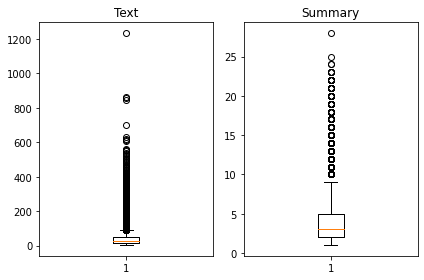

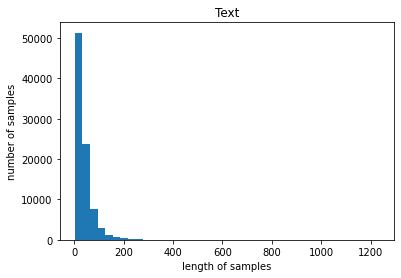

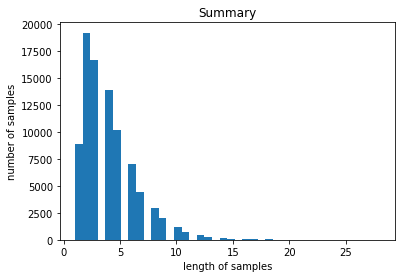

In [18]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

텍스트의 길이가 2:1235 까지 아주 넓지만, 대부분 평균 38로 짧은 길이를 가지고 있다. 요약의 경우는 1:28로 작고 평균 길이는 4로 매우 짧다.

그래서 임의로 텍스트는 50, 요약은 8로 최대길이를 끊어서 전처리해보자.

In [19]:
text_max_len = 50
summary_max_len = 8
print('=3')

=3


임의로 최대값 구간을 설정하면서 데이터가 짤린 샘플의 비율을 확인해보자.

In [20]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
print('=3')

=3


In [21]:
below_threshold_len(text_max_len, data['Text'])
below_threshold_len(summary_max_len,  data['Summary'])

전체 샘플 중 길이가 50 이하인 샘플의 비율: 0.7745119121724859
전체 샘플 중 길이가 8 이하인 샘플의 비율: 0.9424593967517402


텍스트 데이터는 23%의 샘플이 길이가 데이터가 짤리게 되었습니다. 그럼 학습에 큰 왜곡이 발생할 수 있어서 아에 최대길이보다 길면 제외하도록 전처리 한다.

In [22]:
data = data[data['Text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['Summary'].apply(lambda x: len(x.split()) <= summary_max_len)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 65818


샘플 2만개가 더 줄어들었습니다.

### 시작 토큰과 종료 토큰 추가하기

In [23]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['Summary'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['Summary'].apply(lambda x : x + ' eostoken')
data.head()

,Text,Summary,decoder_input,decoder_target
0,bought several vitality canned dog food produc...,good quality dog food,sostoken good quality dog food,good quality dog food eostoken
1,product arrived labeled jumbo salted peanuts p...,not as advertised,sostoken not as advertised,not as advertised eostoken
2,confection around centuries light pillowy citr...,delight says it all,sostoken delight says it all,delight says it all eostoken
3,looking secret ingredient robitussin believe f...,cough medicine,sostoken cough medicine,cough medicine eostoken
4,great taffy great price wide assortment yummy ...,great taffy,sostoken great taffy,great taffy eostoken


디코더 인풋의 앞단에 시작 토큰이 붙었고, 디코더 타겟 데이터 끝단에 종료 토큰이 잘 붙었다.

데이터프레임의 특성값들을 각각 넘파이 배열에 넣어준다.

In [24]:
encoder_input = np.array(data['Text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블
print('=3')

=3


훈련데이터와 테스트 데이터를 임의로 분류하기 위해서 인코더 입력값과 같은 사이즈의 배열을 만들고, 인덱스를 무작위로 섞는다.

In [25]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[ 7230 22764 36392 ... 57649 25908 46670]


무작위로 섞은 후에 인코더 인풋에 재할당해준다.

In [26]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]
print('=3')

=3


유효 평가 데이터를 20% 추출해보자.

In [27]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 13163


In [28]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 52655
훈련 레이블의 개수 : 52655
테스트 데이터의 개수 : 13163
테스트 레이블의 개수 : 13163


### 이제 정수 인코딩을 해보자.

단어 사전을 만들어서 정수 인코딩을 해보자.

컴퓨터가 텍스트를 숫자로 처리할 수 있도록 학습데이터와 테스트 데이터를 모두 정수로 바꾸어 준다.
이때, 고유한 정수를 맵핑하여, 단어사전을 만들어보자.

먼저 학습데이터인 encoder_input_train에 대한 단어사전을 만들자.

단어사전 만들기
- 토크나이저 객체를 만들고
- 덱스트 데이터를 fit_on_texts()메서드를 이용해 토큰화
    - word_index에 단어집합의 고유한 정수번호가 부여됐다.
- 이번에는 빈도수가 낮은 단어들은 제외하고 사용한다.

In [29]:
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성
print('=3')

=3


빈도수 7 미만의 단어들을 제외하려고 하는데 비중이 얼마나 되는지  확인해보자.
src_tokenizer.word_counts.items()에는 단어와 각 단어의 등장 빈도수가 저장되어있다.

In [30]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 32043
등장 빈도가 6번 이하인 희귀 단어의 수: 23816
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 8227
단어 집합에서 희귀 단어의 비율: 74.32512561245825
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.405612023829594


단어사전은 31900여개이며, 빈도수가 7 미만인 단어들이 단어사전의 74.2%를 차지한다.

하지만, 등장 빈도를 보면 희귀 단어가 등장할 확률은 3.39% 정도밖에 되지 않아 상대적으로 크지 않은 비중이다.

그럼 단어사전의 최대 크기를 빈도수 기준으로 8,000개를 설정하자.

In [31]:
src_vocab = 8000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 8,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성
print('=3')

=3


In [32]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[55, 3, 3525, 155, 1994, 3, 7207, 5900, 378, 1062, 29, 91, 416, 86, 29], [234, 131, 15, 561, 50, 78, 175, 2, 435, 80, 44, 142, 66, 144, 749], [1317, 179, 775, 1538, 5901, 434, 3596, 1067, 151, 468, 1142, 1911, 835, 2431, 151, 82, 170, 77, 292, 2694, 57, 411, 234]]


정수 인코딩이 잘 되서, 이제는 텍스트가 아닌 정수들의 배열로 문장들이 출력되고 있다.

요약 데이터도 동일하게 작업을 수행해주자.
- 토크나이저 객체를 만들고
- 요약 학습 데이터를 fit_on_texts()메서드를 이용해 토큰화
    - word_index에 단어집합의 고유한 정수번호가 부여됐다.
- 이번에는 빈도수가 낮은 단어들은 제외하고 사용한다.

In [33]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)
print('=3')

=3


요약데이터는 빈도수 6미만의 자료의 빈도를 확인해보고 생략해보자.

In [34]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 10516
등장 빈도가 5번 이하인 희귀 단어의 수: 8130
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 2386
단어 집합에서 희귀 단어의 비율: 77.31076454925827
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.890838005184248


전체 빈도비율 5.92%를 차지하는 8,128개의 희귀 단어들을 제거하고 2,382개의 단어만 남는다.

이렇게 설정하고자 단어사전의 크기를 2,000개로 설정하여 정수인코딩을 실행하자.

In [35]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 139, 57], [1, 9, 15, 37], [1, 500, 64], [1, 4], [1, 17]]
target
decoder  [[139, 57, 2], [9, 15, 37, 2], [500, 64, 2], [4, 2], [17, 2]]


정수 인코딩이 잘 되었습니다.

이제 패딩을 해야하는데 빈도수가 낮은 단어를 삭제 했는데, 빈도수가 낮은 단어만으로 구성되었던 샘플들이 비어있을 가능성이 있어서 점검해야합니다.

decoder_input에는 시작 토큰이, decoder_target 에는 종료 토큰이 있어서 빈 데이터는 1의 길이를 가질것이다. 그래서 길이가 1인 데이터를 찾아서 제거하자.

In [36]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 1262
삭제할 테스트 데이터의 개수 : 356
훈련 데이터의 개수 : 51393
훈련 레이블의 개수 : 51393
테스트 데이터의 개수 : 12807
테스트 레이블의 개수 : 12807


### 패딩을 추가해보자.

In [37]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=summary_max_len, padding='post')
print('=3')

=3


## 모델 설계하기
### 함수형 API를 이용해 인코더를 설계하자.

- 임베딩 차원 : 128
- 은닉층 크기 : 256

- 임베딩 층
- LSTM1
- LSTM2
- LSTM3

In [38]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
# encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
# encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

### 디코더도 설계하자

#### 디코더 입력층
- 임베딩 층
- LSTM

In [39]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

#### 디코더 출력층
- FC 레이어(softmax 함수)

In [40]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

### 어텐션 메커니즘을 설계하자

이번 실습에서는 케라스의 어텐션 레이어를 가지고 와서 사용해보자.

In [41]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

## 모델 훈련하기

In [42]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
201/201 [==============================] - 21s 71ms/step - loss: 2.7082 - val_loss: 2.3959
Epoch 2/50
201/201 [==============================] - 13s 65ms/step - loss: 2.3641 - val_loss: 2.2700
Epoch 3/50
201/201 [==============================] - 13s 66ms/step - loss: 2.2293 - val_loss: 2.1541
Epoch 4/50
201/201 [==============================] - 13s 66ms/step - loss: 2.1136 - val_loss: 2.0619
Epoch 5/50
201/201 [==============================] - 13s 67ms/step - loss: 2.0245 - val_loss: 2.0007
Epoch 6/50
201/201 [==============================] - 14s 67ms/step - loss: 1.9588 - val_loss: 1.9626
Epoch 7/50
201/201 [==============================] - 14s 68ms/step - loss: 1.9062 - val_loss: 1.9315
Epoch 8/50
201/201 [==============================] - 14s 69ms/step - loss: 1.8593 - val_loss: 1.9096
Epoch 9/50
201/201 [==============================] - 14s 70ms/step - loss: 1.8165 - val_loss: 1.8894
Epoch 10/50
201/201 [==============================] - 14s 69ms/step - loss: 1.780

여기서 callbacks=[\es]는 조기종료 'early stopping'으로 검증 데이터의 손실이 줄어들지 않고 증가하는 현상이 2회 관측되면 멈추도록 설정하는 것이다.

### 학습 데이터와 검증 데이터 손실값 시각화

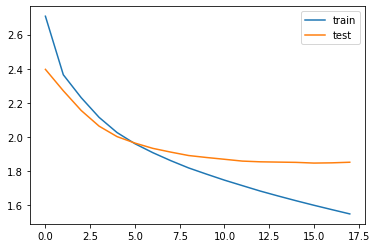

In [43]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## 인퍼런스 모델 구현하기

추론형 모델을 구현해보자.

단어사전 준비
- 원문 단어사전에서 정수를 단어로 변환시킬 사전 (인코딩 입력)
- 요약 단어사전에서 단어들로 정수를 얻고 (디코딩 입력)
- 요약 단어사전에서 정수로 단어를 얻도록 한다.(디코딩 출력)

In [44]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

print('=3')

=3


In [45]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

print('=3')

=3


### 어텐션 메커니즘 사용하는 출력층 설계

In [46]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

print('=3')

=3


In [47]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence
print('=3')

=3


## 모델 테스트하기

테스트 단계에서는 정수 시퀀스를 텍스트 시퀀스로 변환하여 결과를 확인하자.

주어진 정수 시퀀스를 텍스트 시퀀스로 변환하는 함수를 만든다.
- 원문의 정수 시퀀스에서는 패딩을 위해 사용되는 숫자 0을 제외한다.
- Summary의 정수 시퀀스에서는 숫자 0, 시작 토큰의 인덱스, 종료 토큰의 인덱스를 출력에서 제외한다.

In [48]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

print('=3')

=3


In [49]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : want best great toast glaze peanut butter 
실제 요약 : simply the best 
예측 요약 :  love it


원문 : bought popcorn oz popper wife like really need first batch popcorn said great investment christmas family came made batches popcorn everyone loved 
실제 요약 : just like the movies 
예측 요약 :  great popcorn


원문 : always like keep box energy bar office tried many different brands larabar one brands like best feel like snacking munching something go grab energy bar taste energy great best thing much healthier lot energy bars 
실제 요약 : yummy 
예측 요약 :  great tasting and filling


원문 : far great way order favorite coffee become really hard find local stores amazon even cheaper previously paid arrived quickly waiting day next shipment 
실제 요약 : great coffee great price 
예측 요약 :  coffee


원문 : people watching weight everyone great taste come lots flavors try soon 
실제 요약 : love these chips 
예측 요약 :  delicious


원문 : usually make roasted salsa jarred salsa think worth purchasing plus jar local stores find 

예측 요약 :  not bad


원문 : dissapointed potato chips tast ok crunchy tiny pieces 
실제 요약 : dissapointed 
예측 요약 :  not too much


원문 : good value paid fit kurig fine however stronger like left grounds cups assuming net instead cup 
실제 요약 : value 
예측 요약 :  good coffee


원문 : chipotle black bean dip taste great mixed ground turkey top chicken use seasoning dip 
실제 요약 : love this seasoning 
예측 요약 :  great taste


원문 : bought whim found jam made company absolutely loved expect much basic waffle pancake mix much better easy use makes moist fluffy pancakes die never buying bisquick 
실제 요약 : addicted 
예측 요약 :  best pancakes ever


원문 : good little ones best hard find san diego ca thing expensive place wish would cut better deal still buy time time 
실제 요약 : love these 
예측 요약 :  great price


원문 : month old puppy loves toy use need leave home alone keep entertained worked get treats pretty quickly still enjoys game getting bring empty want good toy 
실제 요약 : lab mix loves it 
예측 요약 :  my dog loves th

## 추출적 요약 해보기

### 데이터 다운로드하기

In [50]:
import requests
from summa.summarizer import summarize

메트릭스 시놉시스 가져오기

In [51]:
text = requests.get('http://rare-technologies.com/the_matrix_synopsis.txt').text

In [52]:
print(text[:1500])

The screen is filled with green, cascading code which gives way to the title, The Matrix.

A phone rings and text appears on the screen: "Call trans opt: received. 2-19-98 13:24:18 REC: Log>" As a conversation takes place between Trinity (Carrie-Anne Moss) and Cypher (Joe Pantoliano), two free humans, a table of random green numbers are being scanned and individual numbers selected, creating a series of digits not unlike an ordinary phone number, as if a code is being deciphered or a call is being traced.

Trinity discusses some unknown person. Cypher taunts Trinity, suggesting she enjoys watching him. Trinity counters that "Morpheus (Laurence Fishburne) says he may be 'the One'," just as the sound of a number being selected alerts Trinity that someone may be tracing their call. She ends the call.

Armed policemen move down a darkened, decrepit hallway in the Heart O' the City Hotel, their flashlight beam bouncing just ahead of them. They come to room 303, kick down the door and find a

### summarize 모듈 사용하기

summarize의 파라미터
- text (str) : 요약할 테스트.
- ratio (float, optional) – 요약문에서 원본에서 선택되는 문장 비율. 0~1 사이값
- words (int or None, optional) – 출력에 포함할 단어 수.
- 만약, ratio와 함께 두 파라미터가 모두 제공되는 경우 ratio는 무시한다.
- split (bool, optional) – True면 문장 list / False는 조인(join)된 문자열을 반환

In [53]:
print('Summary:')
print(summarize(text, ratio=0.005))

Summary:
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


In [54]:
print('Summary:')
print(summarize(text, ratio=0.005, split=True))

Summary:
['Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.', 'Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.']


# [프로젝트] 뉴스기사 요약해보기
---

## 1. 데이터 수집하기

아래 링크의 뉴스기사 데이터를 사용합니다.

[뉴스 기사 데이터](https://github.com/sunnysai12345/News_Summary)

In [55]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data_news = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [56]:
data_news.sample(10)

,headlines,text
10108,"Tata Steel Q2 profit rises 270% to Ã¢ÂÂ¹3,600...",The country's oldest steelmaker Tata Steel on ...
48062,I'm in a relationship but it's nobody's busine...,"Anurag Kashyap, while speaking about dating Sh..."
43694,WB farmer calls 700 villagers to bless son for...,A West Bengal farmer invited around 700 villag...
93099,"Indians troll Snapchat CEO's fiancÃÂ©e on ""po...",Indians have taken to Snapchat CEO Evan Spiege...
88140,Zomato to reach out to 66 lakh users for chang...,"Food discovery and ordering platform Zomato, w..."
10791,Man sets bike with 'HR 26 JAAT' plate ablaze w...,"A man allegedly set fire to his motorcycle, wi..."
26116,Devgn to star in biopic on football coach Syed...,Actor Ajay Devgn is set to portray legendary f...
81022,"Don't put my son's orangutan legs online, twee...",Indian racer Karun Chandhok's mother Chitra tw...
59798,"Over 8,500 dengue cases recorded in Delhi this...","The number of dengue cases in Delhi reached 8,..."
12722,Audi's 1st electric SUV delayed by a month ove...,Audi's electric sport utility vehicle (SUV) 'e...


데이터는 원문과 헤드라인 두 가지 특성을 갖는다.
여기서 헤드라인이 원문의 요약정보라고 해서 모델을 학습시키면, 원문이 있다고 했을 때 헤드라인을 뽑아낼 수 있다.

## 2. 데이터 전처리하기

### 2-1 데이터 정리하기
- 중복값 및 Null값 제거하기
- 텍스트 정규화와 불용어 제거
    - 정규화 사전을 활용
    - NLTK에서 제공하는 불용어 리스트 참조

In [57]:
print('전체 샘플수 :', (len(data_news)))
print('text 열에서 중복을 배제한 유일한 샘플의 수 :', data_news['text'].nunique())
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data_news['headlines'].nunique())

전체 샘플수 : 98401
text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280


#### 중복값 제거

In [58]:
data_news.drop_duplicates(subset = ['text'], inplace=True)
print('전체 샘플수 :', (len(data_news)))

전체 샘플수 : 98360


text의 고유값 수로 전체 샘플 수가 줄어들었다.

#### 결측치 확인

In [59]:
print(data_news.isnull().sum())

headlines    0
text         0
dtype: int64


결측치는 없다.

#### 텍스트 정규화 사전 준비
텍스트 정규화 사전은 아래 링크에서 참고했다.

[정규화 사전 출처](https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python)

In [60]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


#### 불용어 사전 준비
NLTK에서 제공하는 불용어 리스트를 참고한다.

In [61]:
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

#### 데이터 전처리 함수 만들기

In [62]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens
print('=3')

=3


#### 원문 데이터 전처리 하기

In [63]:
clean_text = []
for s in data_news['text']:
    clean_text.append(preprocess_sentence(s))

# 전처리 후 출력
print("text 전처리 후 결과: ", clean_text[:5])

text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

#### 헤드라인 데이터 전처리하기

In [64]:
clean_headline = []
# 전체 Summary 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
for s in data_news['headlines']:
    clean_headline.append(preprocess_sentence(s, False))

print("headlines 전처리 후 결과: ", clean_headline[:5])

headlines 전처리 후 결과:  ['upgrad learner switches to career in ml al with salary hike', 'delhi techie wins free food from swiggy for one year on cred', 'new zealand end rohit sharma led india match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'have known hirani for yrs what if metoo claims are not true sonam']


#### 데이터 병합하기

In [65]:
data_news['text'] = clean_text
data_news['headlines'] = clean_headline

# 빈 값을 Null 값으로 변환
data_news.replace('', np.nan, inplace=True)
print('=3')

=3


#### 결측치 확인하기

In [66]:
data_news.isnull().sum()

headlines    0
text         0
dtype: int64

결측치가 없어 제거할 필요가 없다.

### 2-2 학습 데이터와 테스트 데이터 나누기
- 샘플의 최대 길이 정하기
    - 시각화 자료 보기
    - 임의로 적절한 최대길이를 정하자.
        - 원문과 헤드라인의 각각 진행한다.
- 시작 토큰과 종료 토큰 추가하기
    - 디코더 입력 데이터 앞단에 시작 토큰을
    - 디코더 출력 (라벨) 데이터 끝단에 종료 토큰을
- 정수 시퀀스를 이용해 샘플 섞기
- 전체의 20%를 검증데이터로 추출하기

#### 샘플의 최대 길이 정하기

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09968483123221
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.299532330215534


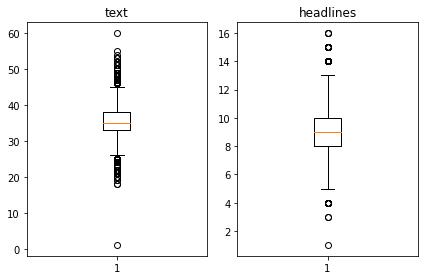

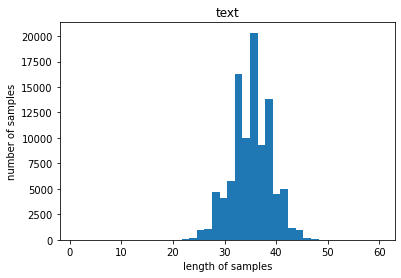

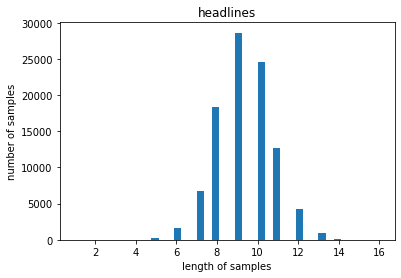

In [67]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data_news['text']]
summary_len = [len(s.split()) for s in data_news['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

#### 원문과 헤드라인 데이터의 임의의 최대길이 정하기

In [68]:
text_max_len = 45
headline_max_len = 13
print('=3')

=3


#### 임의의 최대길이를 만족하지 못하는 샘플의 비율 구하기

In [69]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
print('=3')

=3


In [70]:
below_threshold_len(text_max_len, data_news['text'])
below_threshold_len(headline_max_len,  data_news['headlines'])

전체 샘플 중 길이가 45 이하인 샘플의 비율: 0.9967771451809678
전체 샘플 중 길이가 13 이하인 샘플의 비율: 0.9981699877999186


#### 최대 길이를 만족하지 못하는 경우 제외하기
잘리게 되면, 학습에 왜곡이 발생할 수 있어 제외한다.

In [71]:
data_news = data_news[data_news['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data_news = data_news[data_news['headlines'].apply(lambda x: len(x.split()) <= headline_max_len)]
print('전체 샘플수 :', (len(data_news)))

전체 샘플수 : 97863


최대길이를 만족하지 못하는 경우를 제외 했더니 500여개 샘플 수가 줄었다.

#### 시작 토큰과 종료 토큰 추가하기

In [72]:
data_news['decoder_input'] = data_news['headlines'].apply(lambda x : 'sostoken '+ x)
data_news['decoder_target'] = data_news['headlines'].apply(lambda x : x + ' eostoken')
data_news.head()

,headlines,text,decoder_input,decoder_target
0,upgrad learner switches to career in ml al wit...,saurav kant alumnus upgrad iiit pg program mac...,sostoken upgrad learner switches to career in ...,upgrad learner switches to career in ml al wit...
1,delhi techie wins free food from swiggy for on...,kunal shah credit card bill payment platform c...,sostoken delhi techie wins free food from swig...,delhi techie wins free food from swiggy for on...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
4,have known hirani for yrs what if metoo claims...,speaking sexual harassment allegations rajkuma...,sostoken have known hirani for yrs what if met...,have known hirani for yrs what if metoo claims...


임의의 인덱스로 추출하기위해 학습에 필요한 데이터들을 넘파이 배열로 저장하자.

In [73]:
encoder_input_n = np.array(data_news['text']) # 인코더의 입력
decoder_input_n = np.array(data_news['decoder_input']) # 디코더의 입력
decoder_target_n = np.array(data_news['decoder_target']) # 디코더의 레이블
print('=3')

=3


#### 학습 데이터와 검증 데이터부터 분리해보자.

In [74]:
indices = np.arange(encoder_input_n.shape[0])
np.random.shuffle(indices)
print(indices)

[31672 62510 88539 ... 15113 93429 32510]


데이터들을 섞어서

In [75]:
encoder_input_n = encoder_input_n[indices]
decoder_input_n = decoder_input_n[indices]
decoder_target_n = decoder_target_n[indices]
print('=3')

=3


전체의 20% 비중으로 검증데이터를 추출해보자.

In [76]:
n_of_val_n = int(len(encoder_input_n)*0.2)
print('테스트 데이터의 수 :', n_of_val_n)

테스트 데이터의 수 : 19572


#### 학습 데이터 검증데이터 확인하기

In [77]:
encoder_input_n_train = encoder_input_n[:-n_of_val_n]
decoder_input_n_train = decoder_input_n[:-n_of_val_n]
decoder_target_n_train = decoder_target_n[:-n_of_val_n]

encoder_input_n_test = encoder_input_n[-n_of_val_n:]
decoder_input_n_test = decoder_input_n[-n_of_val_n:]
decoder_target_n_test = decoder_target_n[-n_of_val_n:]

print('훈련 데이터의 개수 :', len(encoder_input_n_train))
print('훈련 레이블의 개수 :', len(decoder_input_n_train))
print('테스트 데이터의 개수 :', len(encoder_input_n_test))
print('테스트 레이블의 개수 :', len(decoder_input_n_test))

훈련 데이터의 개수 : 78291
훈련 레이블의 개수 : 78291
테스트 데이터의 개수 : 19572
테스트 레이블의 개수 : 19572


### 2-3 정수 인코딩
- 케라스의 토크나이저 사용하여 단어사전 만들기
    - fit_on_text()로 단어사전 만들기
    - 적은 빈도로 사용되는 단어들은 제외한다.
        - 데이터 등장 빈도 5% 대 이하로 제외해보자.
    - 원문과 요약 두가지 단어사전을 만든다.
    - 적은 사용 빈도 단어를 제거하면서, Null 값을 갖게된 자료는 제외한다.
- 패딩하기, post 방식으로 한다.

#### 인코더 인풋 단어사전 만들기

In [78]:
ei_tokenizer = Tokenizer() # 토크나이저 정의
ei_tokenizer.fit_on_texts(encoder_input_n_train) # 입력된 데이터로부터 단어 집합 생성
print('=3')

=3


In [79]:
threshold = 7
total_cnt = len(ei_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in ei_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 69293
등장 빈도가 6번 이하인 희귀 단어의 수: 47180
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 22113
단어 집합에서 희귀 단어의 비율: 68.08768562481059
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.4884394463932535


In [80]:
ei_vocab = 22000
ei_tokenizer = Tokenizer(num_words=ei_vocab) # 단어 집합의 크기를 22,000으로 제한
ei_tokenizer.fit_on_texts(encoder_input_n_train) # 단어 집합 재생성
print('=3')

=3


In [81]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_n_train = ei_tokenizer.texts_to_sequences(encoder_input_n_train) 
encoder_input_n_test = ei_tokenizer.texts_to_sequences(encoder_input_n_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_n_train[:3])

[[172, 882, 4635, 44, 253, 5411, 558, 6461, 459, 9623, 1900, 2560, 2923, 2937, 1, 1135, 5568, 100, 1062, 5412, 5923, 6461, 8380, 2, 4636, 5858, 4, 882, 2744, 38, 482, 7094, 2040, 1279, 4635, 1745], [3679, 792, 1857, 1257, 9257, 130, 9812, 2699, 2371, 3496, 2852, 565, 18, 1273, 941, 3450, 131, 3698, 1222, 76, 54, 88, 2852, 106, 30, 273, 121, 2208, 987, 926, 1974, 730, 990], [78, 6242, 4990, 322, 908, 14226, 1, 1010, 5456, 174, 4, 392, 891, 1432, 1329, 10464, 1185, 112, 965, 6242, 1, 50, 7986, 3680, 310, 1498, 891, 9444, 8257, 11227]]


인코더 입력 단어사전이 완성되었다.

#### 디코더 입력 데이터 단어사전 만들기

In [82]:
di_tokenizer = Tokenizer()
di_tokenizer.fit_on_texts(decoder_input_n_train)
print('=3')

=3


In [83]:
threshold = 6
total_cnt = len(di_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in di_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 29966
등장 빈도가 5번 이하인 희귀 단어의 수: 19558
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 10408
단어 집합에서 희귀 단어의 비율: 65.26730294333578
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.6386384820942075


전체 등장 빈도에서 희귀 단어 등장 빈도 비율이 5%이하로 나왔다. 10,000개로 컷오프 시켜서 진행시킨다.

In [84]:
di_vocab = 10000
di_tokenizer = Tokenizer(num_words=di_vocab) 
di_tokenizer.fit_on_texts(decoder_input_n_train)
di_tokenizer.fit_on_texts(decoder_target_n_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_n_train = di_tokenizer.texts_to_sequences(decoder_input_n_train) 
decoder_target_n_train = di_tokenizer.texts_to_sequences(decoder_target_n_train)
decoder_input_n_test = di_tokenizer.texts_to_sequences(decoder_input_n_test)
decoder_target_n_test = di_tokenizer.texts_to_sequences(decoder_target_n_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_n_train[:5])
print('target')
print('decoder ',decoder_target_n_train[:5])

input
input  [[1, 865, 65, 10, 2505, 4, 3370, 7215, 1533, 7, 3667, 155], [1, 55, 3, 72, 2046, 6821, 3455, 277, 2143], [1, 24, 10, 508, 4017, 5, 265, 4018, 7, 975], [1, 1102, 459, 720, 173, 2047, 2840], [1, 3, 21, 100, 1517, 5, 3557, 221]]
target
decoder  [[865, 65, 10, 2505, 4, 3370, 7215, 1533, 7, 3667, 155, 2], [55, 3, 72, 2046, 6821, 3455, 277, 2143, 2], [24, 10, 508, 4017, 5, 265, 4018, 7, 975, 2], [1102, 459, 720, 173, 2047, 2840, 2], [3, 21, 100, 1517, 5, 3557, 221, 2]]


등장 빈도가 낮은 단어를 삭제하면서 결측치가 된 데이터는 학습에 왜곡을 일으키기 때문에 제거하자.

In [86]:
drop_train = [index for index, sentence in enumerate(decoder_input_n_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_n_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_n_train = [sentence for index, sentence in enumerate(encoder_input_n_train) if index not in drop_train]
decoder_input_n_train = [sentence for index, sentence in enumerate(decoder_input_n_train) if index not in drop_train]
decoder_target_n_train = [sentence for index, sentence in enumerate(decoder_target_n_train) if index not in drop_train]

encoder_input_n_test = [sentence for index, sentence in enumerate(encoder_input_n_test) if index not in drop_test]
decoder_input_n_test = [sentence for index, sentence in enumerate(decoder_input_n_test) if index not in drop_test]
decoder_target_n_test = [sentence for index, sentence in enumerate(decoder_target_n_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_n_train))
print('훈련 레이블의 개수 :', len(decoder_input_n_train))
print('테스트 데이터의 개수 :', len(encoder_input_n_test))
print('테스트 레이블의 개수 :', len(decoder_input_n_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 78291
훈련 레이블의 개수 : 78291
테스트 데이터의 개수 : 19572
테스트 레이블의 개수 : 19572


#### 패딩하기

In [87]:
encoder_input_n_train = pad_sequences(encoder_input_n_train, maxlen=text_max_len, padding='post')
encoder_input_n_test = pad_sequences(encoder_input_n_test, maxlen=text_max_len, padding='post')
decoder_input_n_train = pad_sequences(decoder_input_n_train, maxlen=headline_max_len, padding='post')
decoder_target_n_train = pad_sequences(decoder_target_n_train, maxlen=headline_max_len, padding='post')
decoder_input_n_test = pad_sequences(decoder_input_n_test, maxlen=headline_max_len, padding='post')
decoder_target_n_test = pad_sequences(decoder_target_n_test, maxlen=headline_max_len, padding='post')
print('=3')

=3


## 3. 어텐션 메커니즘 사용하기

- 어텐션 메커니즘 모델 설계
    - 인코더 설계
    - 디코더 입력 설계
    - 디코더 출력 설계
    - 인코더 출력과 디코더 출력값을 어텐션 레이어에 넣어 어텐션 출력값을 만든다.
        - 케라스에서 어텐션 레이어를 가져온다.
    - 어텐션의 출력값과 디코더의 출력값을 합친다.


#### 인코더 설계하기

In [111]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(ei_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
# encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
# encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

#### 디코더 입력층 설계하기

In [112]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(di_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

#### 디코더 출력층 설계하기

In [113]:
# 디코더의 출력층
decoder_softmax_layer = Dense(di_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 45)]         0                                            
__________________________________________________________________________________________________
embedding_11 (Embedding)        (None, 45, 128)      2816000     input_15[0][0]                   
__________________________________________________________________________________________________
lstm_23 (LSTM)                  [(None, 45, 256), (N 394240      embedding_11[0][0]               
__________________________________________________________________________________________________
input_16 (InputLayer)           [(None, None)]       0                                            
___________________________________________________________________________________________

#### 어텐션 메커니즘
인코더와 디코더를 어텐션 레이어와 결합시켜준다.

In [114]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(di_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 45)]         0                                            
__________________________________________________________________________________________________
embedding_11 (Embedding)        (None, 45, 128)      2816000     input_15[0][0]                   
__________________________________________________________________________________________________
lstm_23 (LSTM)                  [(None, 45, 256), (N 394240      embedding_11[0][0]               
__________________________________________________________________________________________________
input_16 (InputLayer)           [(None, None)]       0                                            
___________________________________________________________________________________________

#### 모델 훈련하기

In [115]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history_n = model.fit(x=[encoder_input_n_train, decoder_input_n_train], y=decoder_target_n_train, \
          validation_data=([encoder_input_n_test, decoder_input_n_test], decoder_target_n_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
306/306 [==============================] - 38s 105ms/step - loss: 5.2273 - val_loss: 4.8015
Epoch 2/50
306/306 [==============================] - 32s 105ms/step - loss: 4.6422 - val_loss: 4.4278
Epoch 3/50
306/306 [==============================] - 32s 104ms/step - loss: 4.3283 - val_loss: 4.2115
Epoch 4/50
306/306 [==============================] - 32s 103ms/step - loss: 4.0950 - val_loss: 4.0351
Epoch 5/50
306/306 [==============================] - 32s 105ms/step - loss: 3.9092 - val_loss: 3.9039
Epoch 6/50
306/306 [==============================] - 32s 104ms/step - loss: 3.7562 - val_loss: 3.8134
Epoch 7/50
306/306 [==============================] - 32s 105ms/step - loss: 3.6212 - val_loss: 3.7343
Epoch 8/50
306/306 [==============================] - 32s 104ms/step - loss: 3.5040 - val_loss: 3.6625
Epoch 9/50
306/306 [==============================] - 32s 104ms/step - loss: 3.3982 - val_loss: 3.6152
Epoch 10/50
306/306 [==============================] - 32s 105ms/step - l

#### 학습 데이터의 손실과 검증 데이터의 손실 시각화하기

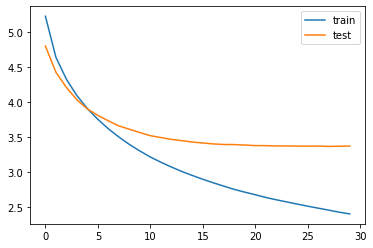

In [116]:
plt.plot(history_n.history['loss'], label='train')
plt.plot(history_n.history['val_loss'], label='test')
plt.legend()
plt.show()

#### 인퍼런스 모델(추상화 모델) 구현하기

In [117]:
ei_index_to_word = ei_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
di_word_to_index = di_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
di_index_to_word = di_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

print('=3')

=3


In [118]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

print('=3')

=3


In [119]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

print('=3')

=3


In [120]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence
print('=3')

=3


## 4. 실제 헤드라인과 예측된 헤드라인 비교하기
- 원문과 헤드라인의 시퀀스를 텍스트로 변환시키는 함수 선언
- 50개 샘플에 대해 실제 헤드라인과 예측된 헤드라인을 비교

In [121]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

print('=3')

=3


In [122]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_n_test[i]))
    print("실제 헤드라인 :", seq2summary(decoder_input_n_test[i]))
    print("예측 헤드라인 :", decode_sequence(encoder_input_n_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : well sugar amazon table issue brand risk heliotis flowers important water yorkie band problem rum never months like well grab dogs sold spoonful rich ferrets version effects agree yorkie 
실제 헤드라인 : flavor of lame times great soothing quality finishing 
예측 헤드라인 :  flavor too italian great very combo good


원문 : shifts dog deeper bed household ian none local however care also depressed frig never colorado coming anywhere ian organization remotely local spaniel lb look unfiltered originally advertising asparagus ian bodied fat torani exactly 
실제 헤드라인 : canin bacon walnuts en lungo sugar dental if hot dreamfield 
예측 헤드라인 :  packaging found but subscription for but subscription


원문 : debris fever like szechuan incorporating yet use crackers best contain definately instance stale item yet eggs creamy debris like better run yet warning places unflavored ordered product obnoxious satisfied crazy topping pick 
실제 헤드라인 : and as apocalypse lot right bags great what described no ferns 
예측 헤드

예측 헤드라인 :  so yummy well good nice mango sweet


원문 : lemon lunchtime fan one perfect anyone top soda oolongs crap recovering variety jif supposed unharmed used hard crate crap great get recipe last aromas sorry amazed cherry aromas said show 
실제 헤드라인 : are in good licorice even great buds florescent minutes the cube on 
예측 헤드라인 :  in newmans great houtte product potato in


원문 : fine morning dog gas caffeinated legite graduation noodles spicy aftertaste morning bulk product bought grace questions sugars trigger dog fiberone careful gas old strong natural cause noodles kibble morning etc packaging oil increase posted love frankly moved spicy noodles 
실제 헤드라인 : helps lish peanut san starbucks cashews regular 
예측 헤드라인 :  helps energy but san regular not but


원문 : lasts decrease greenies quite lemon price preference business like could applesauce product session long product super amish incidentally really food handled business like lunch lemon minimize orange wore although wholesome sam

예측 헤드라인 :  plate burns grandma my but are chocolate


원문 : staple pronounce jumps anyone products bigger quite metallic use products chew sea stronger quite chew sea hidden links paste dental chocolate properly bright paste like staple 
실제 헤드라인 : adult clump endless great now low deal 
예측 헤드라인 :  deal mouth great salty this best durable


원문 : number noticed vegetables herb treat heavy well cinnamon amazon et unsweetened convenience much chews always table issue well dressing always acidity publix like needed smell wish described dearest blend overwhelm publix taste herb dismayed switched issue used chicago well amazon 
실제 헤드라인 : amazone plant gross disappointing pitcher refreshing as italian 
예측 헤드라인 :  italian drop italian the ever good flavor


원문 : free direct stevia response free program purchased several instance stale year best way eat lower chocolaty less program say best eat tastes instance tried glad doesnt chocolaty robust oregon esp direct 
실제 헤드라인 : hint assortment toxic d

원문에서 헤드라인을 예측해냈다. 하지만, 실제 헤드라인과 유사하지 않았다. 생성된 문장의 어순도 문제가 많아 보인다.

생성된 'plate burns grandma my but are chocolate' 헤드라인에서 but이 명사 자리에 쓰여진 것이 좋은 품질이라고 하기 어렵다.

## 5. Summa을 이용해서 추출적 요약해보기

In [139]:
text_sum = encoder_input_n_test.copy()

summa_test = seq2text(text_sum[50])

print(summa_test)

well sugar amazon table issue brand risk heliotis flowers important water yorkie band problem rum never months like well grab dogs sold spoonful rich ferrets version effects agree yorkie 


In [143]:
print(summarize(summa_test, ratio = 0.5))

summarize()함수가 출력되지 않는다.

In [137]:
from summa.summarizer import summarize

for i in range(50, 100):
    text_sum = seq2text(encoder_input_n_test[i])
    text_pre = summarize(text_sum, ratio=0.5)
    print("원문 :", text_sum)
    print("실제 헤드라인 :", seq2summary(decoder_input_n_test[i]))
    print("예측 헤드라인 :", text_pre)
    print("\n")

원문 : well sugar amazon table issue brand risk heliotis flowers important water yorkie band problem rum never months like well grab dogs sold spoonful rich ferrets version effects agree yorkie 
실제 헤드라인 : flavor of lame times great soothing quality finishing 
예측 헤드라인 : 


원문 : shifts dog deeper bed household ian none local however care also depressed frig never colorado coming anywhere ian organization remotely local spaniel lb look unfiltered originally advertising asparagus ian bodied fat torani exactly 
실제 헤드라인 : canin bacon walnuts en lungo sugar dental if hot dreamfield 
예측 헤드라인 : 


원문 : debris fever like szechuan incorporating yet use crackers best contain definately instance stale item yet eggs creamy debris like better run yet warning places unflavored ordered product obnoxious satisfied crazy topping pick 
실제 헤드라인 : and as apocalypse lot right bags great what described no ferns 
예측 헤드라인 : 


원문 : read broken share filler right utterly macaroni walkers split expensive shows perf

몇가지 더 시도를 해봤는데 왜 안되는지는 알지 못하겠다.

# 회고

이번 텍스트 요약은 인코더-디코더 seq2seq에 케라스 어텐션 레이어를 통해서, 긴 길이의 시퀀스를 입력받아서 텍스트를 생성하도록 했다.
결과적으로는 아쉬운 부분이 많다. 하지만, 텍스트를 요약하는 방법에 대한 큰 맥락을 이해할 수 있어서 좋았다.

## 배운 점
- seq2seq의 구조를 다시한번 복습했다. 그리고 케라스 레이어를 사용해 어텐션도 구현해 봤는데 아직은 정확하게 이해하진 못했지만, LSTM의 구조에 대해 더 깊게 공부한 거 같다.
- 단어사전에 대해 이제 좀 이해가 된거 같다.

## 아쉬운 점
- summa의 summarize()를 사용해서 추출적 요약을 해보고 비교해보지 못해서 아쉽다.
- 추상적 표현이 예상만큼 훌륭한 결과가 아니라서 추출적 요약에 대한 결과 값이 궁굼했지만, 다음을 기약해야겠다.
- 검증데이터 손실값이 트레인보다 상대적으로 높았다. 정칙화를 몇가지 시도해봤으면 어떘을까 하는 아쉬움이 든다.